In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv("data/[1h]BTCUSDT.csv")

In [3]:
dataset.head()

,Start,Stop,Open,Close,Low,High,Volume
0,1502942400000,1502945999999,4261.48,4308.83,4261.32,4313.62,47.181009
1,1502946000000,1502949599999,4308.83,4315.32,4291.37,4328.69,23.234916
2,1502949600000,1502953199999,4330.29,4324.35,4309.37,4345.45,7.229691
3,1502953200000,1502956799999,4316.62,4349.99,4287.41,4349.99,4.443249
4,1502956800000,1502960399999,4333.32,4360.69,4333.32,4377.85,0.972807


In [4]:
dataset.size

206332

Text(0, 0.5, 'Open Price')

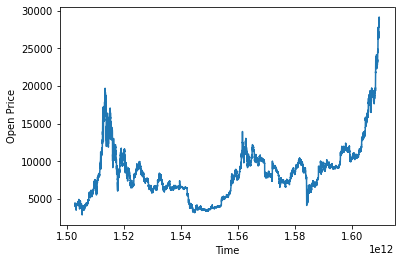

In [5]:
# open price plot
plt.plot(dataset.Start, dataset.Open)
plt.xlabel("Time")
plt.ylabel("Open Price")

Text(0, 0.5, 'Close Price')

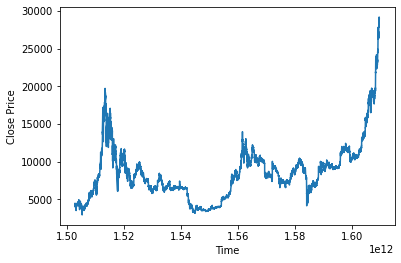

In [6]:
# close price plot
plt.plot(dataset.Stop, dataset.Close)
plt.xlabel("Time")
plt.ylabel("Close Price")

Text(0, 0.5, 'Price')

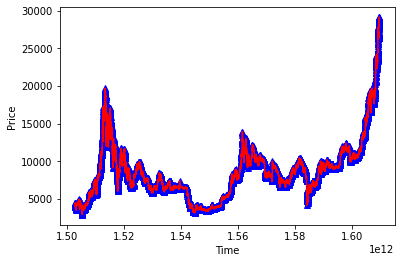

In [7]:
# open and close price at one plot
plt.plot(dataset.Start, dataset.Open, 'b^', dataset.Stop, dataset.Close, 'r-')
plt.xlabel("Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

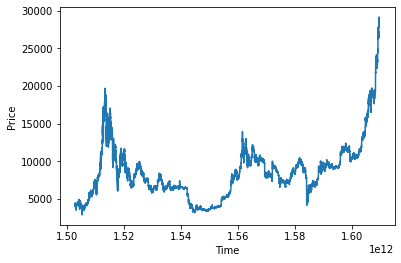

In [8]:
# open and close price at one plot v2
time = pd.concat([dataset.Stop, dataset.Start])
value = pd.concat([dataset.Close, dataset.Open])

plot_df = time.to_frame(name="time")
plot_df["value"] = value

plot_df = plot_df.sort_values(by=['time'])

plt.plot(plot_df.time, plot_df.value)
plt.xlabel("Time")
plt.ylabel("Price")

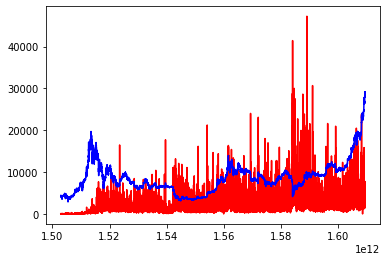

In [9]:
# open price and volume at one plot
plt.plot((dataset.Start + dataset.Stop) / 2, dataset.Volume, 'r', dataset.Start, dataset.Open, 'b')

In [10]:
diff_df = dataset[["Volume"]].copy()
diff = dataset["High"].copy() - dataset["Low"].copy()
diff_df["Diff"] = diff
diff_df.head()

,Volume,Diff
0,47.181009,52.30
1,23.234916,37.32
2,7.229691,36.08
3,4.443249,62.58
4,0.972807,44.53


Text(0, 0.5, 'Volume')

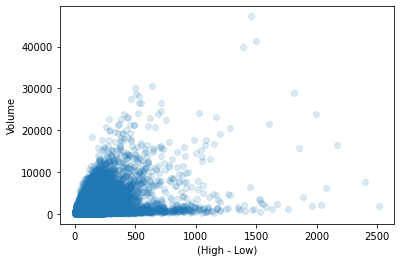

In [11]:
# plot (High - Low) ~ Volume
plt.plot(diff_df.Diff, diff_df.Volume, linestyle="",marker="o", alpha=0.15)
plt.xlabel("(High - Low)")
plt.ylabel("Volume")

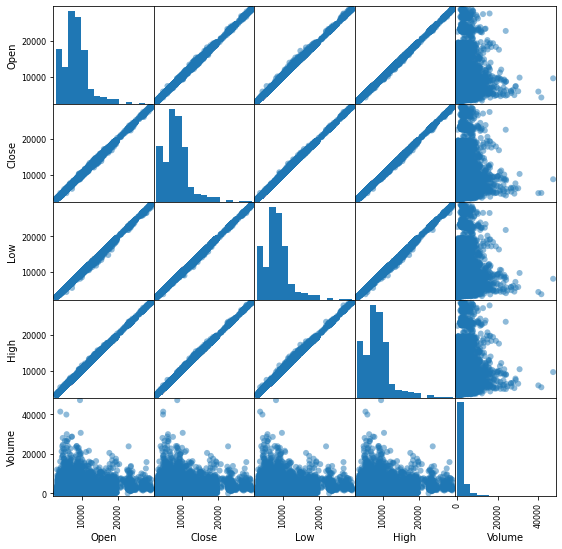

In [12]:
# scatter matrix
from matplotlib import cm

if dataset.size > 250000 :
    pass
else:
    X = dataset[['Open', 'Close', 'Low', 'High', 'Volume']]

    cmap = cm.get_cmap('gnuplot')
    scatter = pd.plotting.scatter_matrix(X, marker = 'o', hist_kwds={'bins':15}, figsize=(9,9))

Text(0, 0.5, '1st pca(Open, Close, Low, High, Volume)')

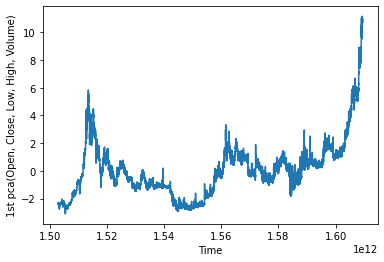

In [13]:
# plot start ~ 1st pca(Open, Close, Low, High, Volume)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset_pca = StandardScaler().fit_transform(dataset[["Open", "Close", "Low", "High", "Volume"]].copy())

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dataset_pca)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component'])

plt.plot(dataset.Start, principalDf)
plt.xlabel("Time")
plt.ylabel("1st pca(Open, Close, Low, High, Volume)")

Text(0.5, 0, '1st pca(Open, Close, Low, High)')

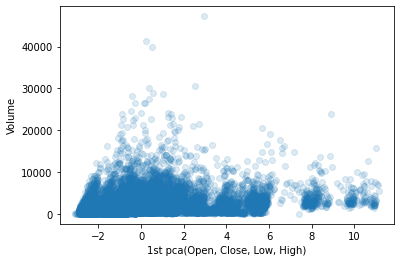

In [15]:
# plot 1st pca(Open, Close, Low, High) ~ Volume
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset_pca_2 = StandardScaler().fit_transform(dataset[["Open", "Close", "Low", "High", "Volume"]].copy())

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(dataset_pca_2)
principalDf_2 = pd.DataFrame(data = principalComponents, columns = ['principal component'])

plt.plot(principalDf_2, dataset.Volume, linestyle="",marker="o", alpha=0.15)
plt.ylabel("Volume")
plt.xlabel("1st pca(Open, Close, Low, High)")